In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
athlete_events = pd.read_csv('athlete_events_cleaned.csv')

In [3]:
athlete_events.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24,180,80,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No
1,A Lamusi,M,23,170,60,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No
2,Gunnar Nielsen Aaby,M,24,175,70,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No
3,Edgar Lindenau Aabye,M,34,188,95,Denmark,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No


In [4]:
# ~ 270K row
athlete_events.shape

(269743, 14)

# Descriptive statistics

In [5]:
athlete_events.describe().astype('int64')

,Age,Height,Weight,Year
count,269743,269743,269743,269743
mean,25,175,70,1978
std,6,9,13,29
min,10,127,25,1896
25%,22,169,62,1960
50%,24,175,70,1988
75%,28,181,77,2002
max,97,229,214,2016


In [6]:
# 120 years of Olympic history: from 1896 to 2016
athlete_events['Year'].max() - athlete_events['Year'].min()

120

In [7]:
# 35 Olympics Game
len(athlete_events['Year'].unique())

35

In [8]:
years = sorted(athlete_events['Year'].unique())

for i in range(len(years)-1): 
    print(f"{(years[i], years[i+1])}: {years[i+1] - years[i]}")

(1896, 1900): 4
(1900, 1904): 4
(1904, 1906): 2
(1906, 1908): 2
(1908, 1912): 4
(1912, 1920): 8
(1920, 1924): 4
(1924, 1928): 4
(1928, 1932): 4
(1932, 1936): 4
(1936, 1948): 12
(1948, 1952): 4
(1952, 1956): 4
(1956, 1960): 4
(1960, 1964): 4
(1964, 1968): 4
(1968, 1972): 4
(1972, 1976): 4
(1976, 1980): 4
(1980, 1984): 4
(1984, 1988): 4
(1988, 1992): 4
(1992, 1994): 2
(1994, 1996): 2
(1996, 1998): 2
(1998, 2000): 2
(2000, 2002): 2
(2002, 2004): 2
(2004, 2006): 2
(2006, 2008): 2
(2008, 2010): 2
(2010, 2012): 2
(2012, 2014): 2
(2014, 2016): 2


The difference between each game and the other is 4 or 2 years, however there is a big gap in (1912, 1920) and (1936, 1948)

**After searching:**
- The `1916 Summer Olympics` to have been held in Berlin, capital of the German Empire, were cancelled due to world war I. When the Olympic Games resumed after the war, Antwerp was awarded hosting the `1920 Summer Games` as tribute to the Belgian people. 

- The `1948 Summer Olympics` I found that the twelve-year hiatus caused by the outbreak of world war II. The world war II lasted from 1939 to 1945.

### Exploring `Age` column

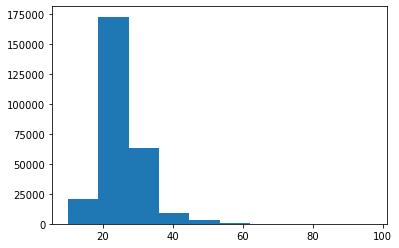

In [9]:
plt.hist(athlete_events['Age'])
plt.show()

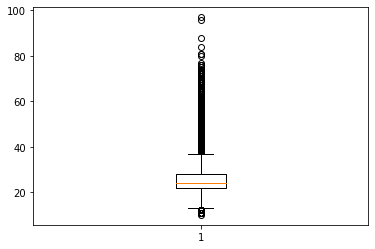

In [10]:
plt.boxplot(athlete_events['Age'])
plt.show()

The shape is a right-skewed and has a many outliers values, I'll categorize the column to have a better look.

In [11]:
# Categorize Age column
bins = [athlete_events['Age'].min()-1, 16, 30, 45, athlete_events['Age'].max()] # [exclusive, inclusive, ex.., in..]
labels = ['Child', 'Young Adult', 'Middle-aged Adult', 'Old-aged Adult']

athlete_events['Age Group'] = pd.cut(athlete_events['Age'], bins=bins, labels=labels)

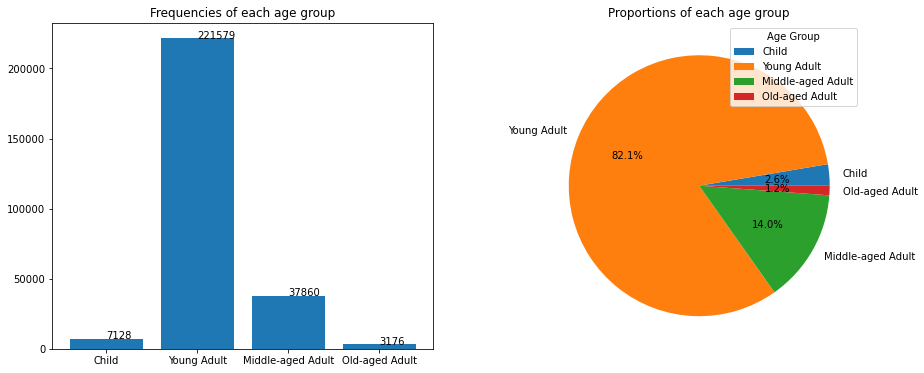

In [12]:
age_dict = athlete_events['Age Group'].value_counts().to_dict()

values = [age_dict['Child'], age_dict['Young Adult'], age_dict['Middle-aged Adult'], age_dict['Old-aged Adult']]
labels = ['Child', 'Young Adult', 'Middle-aged Adult', 'Old-aged Adult']

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Bar chart
axes[0].bar(labels, values)
for index, data in enumerate(values):
    axes[0].text(x=index, y=data, s=f"{data}", fontsize=10)
axes[0].set_title('Frequencies of each age group')

# Pie Chart
axes[1].pie(values, labels=labels, autopct='%1.1f%%')
axes[1].legend(title = 'Age Group')
axes[1].set_title('Proportions of each age group')

plt.show()

**Distribution of `Age Group` for players who won medals**

As I expected the youth are the most medalists.


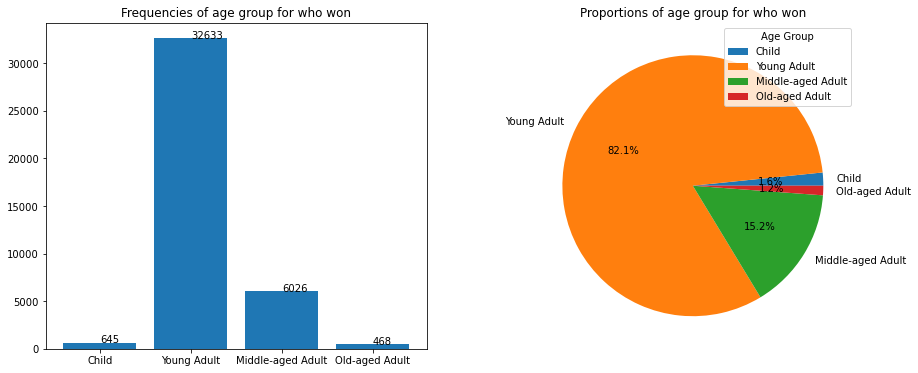

In [13]:
# Bar chart of ages for players who won medals
won_medal = athlete_events[athlete_events['Medal'] != 'No']['Age Group'].value_counts().to_dict()

values = [won_medal['Child'], won_medal['Young Adult'], won_medal['Middle-aged Adult'], won_medal['Old-aged Adult']]
labels = ['Child', 'Young Adult', 'Middle-aged Adult', 'Old-aged Adult']

print("As I expected the youth are the most medalists.")

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Bar chart
axes[0].bar(labels, values)
for index, data in enumerate(values):
    axes[0].text(x=index, y=data, s=f"{data}", fontsize=10)
axes[0].set_title('Frequencies of age group for who won')

# Pie Chart
axes[1].pie(values, labels=labels, autopct='%1.1f%%')
axes[1].legend(title = 'Age Group')
axes[1].set_title('Proportions of age group for who won')

plt.show()

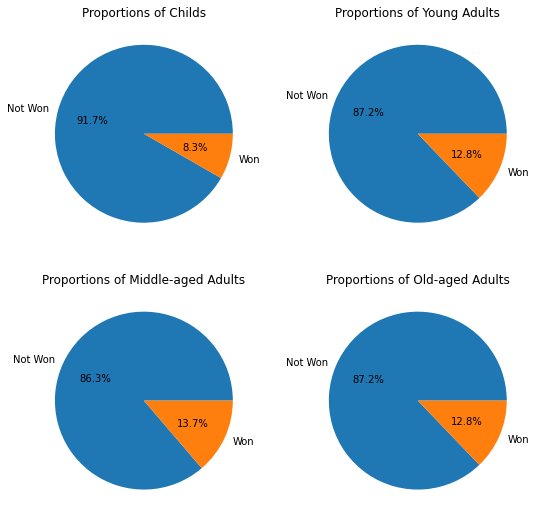

In [14]:
all_age = [age_dict['Child'], age_dict['Young Adult'], age_dict['Middle-aged Adult'], age_dict['Old-aged Adult']]
won_age = [won_medal['Child'], won_medal['Young Adult'], won_medal['Middle-aged Adult'], won_medal['Old-aged Adult']]

labels = ['Child', 'Young Adult', 'Middle-aged Adult', 'Old-aged Adult']

fig, axes = plt.subplots(2, 2, figsize=(9, 9))

for all_, won, label, ax in zip(all_age, won_age, labels, axes.flatten()):
    ax.pie([all_, won], labels=['Not Won', 'Won'], autopct='%1.1f%%')
    ax.set_title(f"Proportions of {label}s")

**Distribution of the `Height` for each `Age Group`**

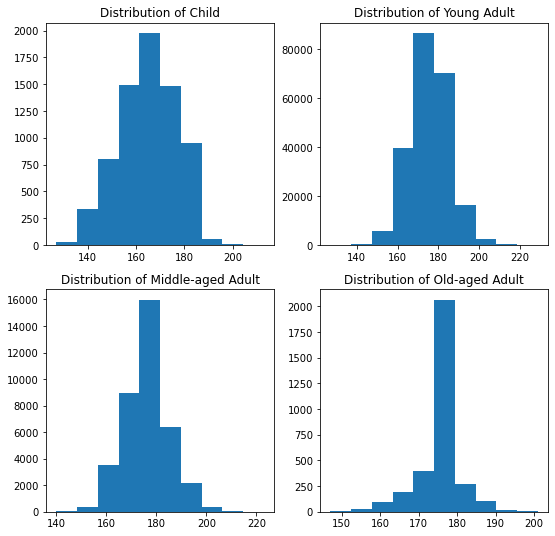

In [15]:
labels = ['Child', 'Young Adult', 'Middle-aged Adult', 'Old-aged Adult']
fig, axes = plt.subplots(2, 2, figsize=(9, 9))

for label, ax in zip(labels, axes.flatten()):
    ax.hist(athlete_events[athlete_events['Age Group'] == label]['Height'])
    ax.set_title(f'Distribution of {label}')
    
plt.show()

**Distribution of the `Weight` for each `Age Group`**

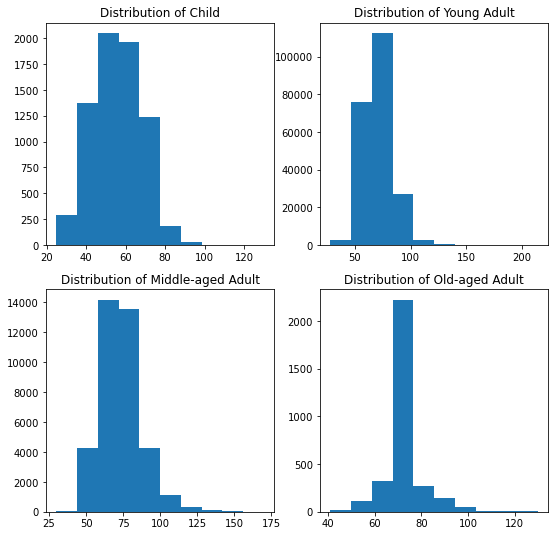

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(9, 9))

for label, ax in zip(labels, axes.flatten()):
    ax.hist(athlete_events[athlete_events['Age Group'] == label]['Weight'])
    ax.set_title(f'Distribution of {label}')
    
plt.show()

**Relationship between `Weight` and `Height` for each `Age Group`**

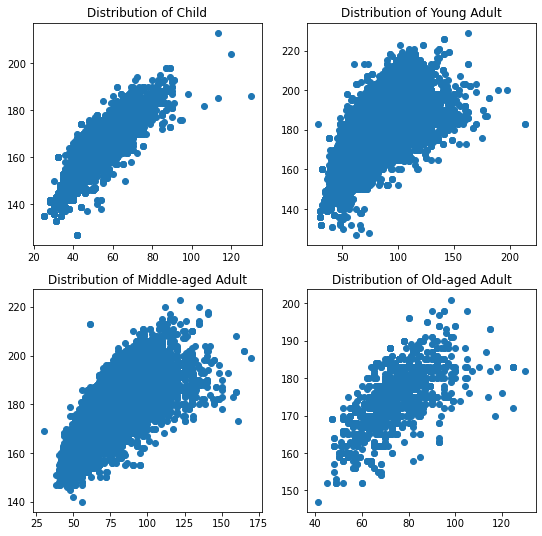

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(9, 9))

for label, ax in zip(labels, axes.flatten()):
    Height = athlete_events[athlete_events['Age Group'] == label]['Height']
    Weight = athlete_events[athlete_events['Age Group'] == label]['Weight']
    ax.scatter(x = Weight, y = Height)
    ax.set_title(f'Distribution of {label}')
    
plt.show()

### Exploring `Medal` column

In [18]:
athlete_events['Medal'].value_counts()

No        229971
Gold       13369
Bronze     13295
Silver     13108
Name: Medal, dtype: int64

In [19]:
len(athlete_events[athlete_events['Medal'] != 'No'])

39772

**Frequency Table of `Medals` for each gender**

In [20]:
# Frequency Table for 'Medal' column and for each gender
total_counts = athlete_events['Medal'].value_counts()
total_percentage = round(athlete_events['Medal'].value_counts(normalize=True).mul(100), 2)

m_counts = athlete_events[athlete_events['Sex'] == 'M']['Medal'].value_counts()
f_counts = athlete_events[athlete_events['Sex'] == 'F']['Medal'].value_counts()

medal_freq = pd.concat([m_counts, f_counts, total_counts, total_percentage], axis=1, keys=('Males', 'Females',
                                                                                           'TOTAL COUNTS','TOTAL PERCENTAGE'))
medal_freq.loc['Total'] = [medal_freq['Males'].sum(), medal_freq['Females'].sum(),
                           medal_freq['TOTAL COUNTS'].sum(), medal_freq['TOTAL PERCENTAGE'].sum()]

# Rorder the rows
medal_freq = medal_freq.reindex(['Gold', 'Silver', 'Bronze', 'No', 'Total']).astype({col: int for col in medal_freq.columns[:-1]})
medal_freq

,Males,Females,TOTAL COUNTS,TOTAL PERCENTAGE
Gold,9622,3747,13369,4.96
Silver,9373,3735,13108,4.86
Bronze,9524,3771,13295,4.93
No,166841,63130,229971,85.26
Total,195360,74383,269743,100.01


**Visualizing `Medals`**

39772 Total players won a medals from 269743, about 15% from the participating players over 35 Olympics Game


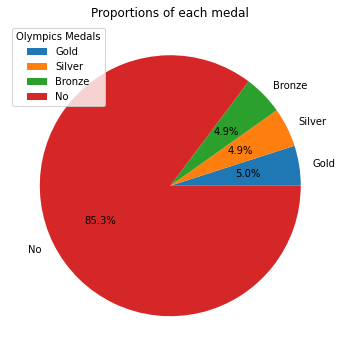

In [21]:
won = medal_freq.loc[['Gold', 'Silver', 'Bronze'], 'TOTAL COUNTS'].sum()
total = medal_freq.loc['Total', 'TOTAL COUNTS']
won_perc = int(round(won/total, 2) * 100)
print(f"{won} Total players won a medals from {total}, about {won_perc}% from the participating players over 35 Olympics Game")

# Pie cahrt
values = medal_freq.loc[medal_freq.index != 'Total', 'TOTAL COUNTS']
labels = medal_freq.index.to_list()[:-1]

plt.figure(figsize=(6,6))
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.legend(title = 'Olympics Medals')
plt.title('Proportions of each medal')
plt.show()

**Visualizing `Sex` column for players who won medals**

28519 Male and 11253 Female who won a medals from 39772 , About 72% males and 28% females


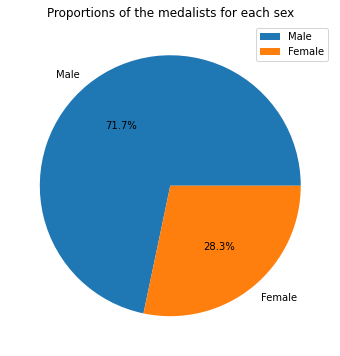

In [22]:
male = medal_freq.loc[['Gold', 'Silver', 'Bronze'], 'Males'].sum()
female = medal_freq.loc[['Gold', 'Silver', 'Bronze'], 'Females'].sum()

men_perc = int(round(male/won, 2) * 100)
fem_perc = int(round(female/won, 2) * 100)
print(f"{male} Male and {female} Female who won a medals from {won} , About {men_perc}% males and {fem_perc}% females")

# Pie cahrt
values = [male, female]
labels = ['Male', 'Female']

plt.figure(figsize=(6,6))
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.legend()
plt.title('Proportions of the medalists for each sex')
plt.show()

**Follow the number of participating players for each `sex`**

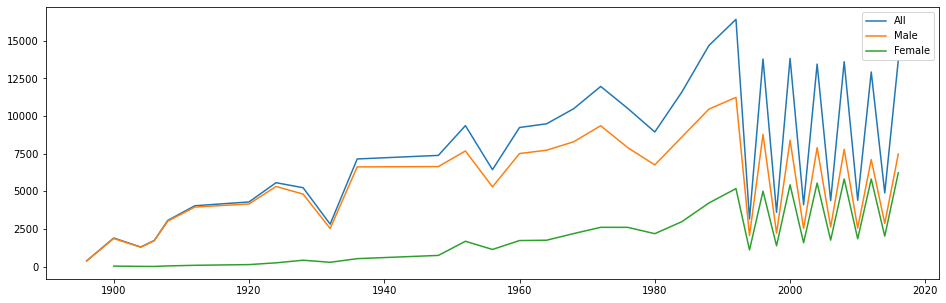

The highest number of participating for both sex is 16413 in 1992
The highest number of participation for men is 11235 in 1992 and for females is 6228 in 2016
As we see the number of participating it continued to increase until it reached the highest number of participating in 1992 and then the number of participating began to decrease and increase until 2016.


In [23]:
def sort_dict(dic):
    keys = []
    values = []
    for key in sorted(dic.keys()):
        keys.append(key)
        values.append(dic[key])
    # return list of two lists
    return [keys, values]

all_ = sort_dict(athlete_events['Year'].value_counts())
males = sort_dict(athlete_events[athlete_events['Sex'] == 'M']['Year'].value_counts().to_dict())
females = sort_dict(athlete_events[athlete_events['Sex'] == 'F']['Year'].value_counts().to_dict())

# Line plot
plt.figure(figsize=(16,5))
plt.plot(all_[0], all_[1])
plt.plot(males[0], males[1])
plt.plot(females[0], females[1])
plt.legend(['All', 'Male', 'Female'])
plt.show()

# Comment on the graph
highest = athlete_events['Year'].value_counts().iloc[0]
high_year = list(athlete_events['Year'].value_counts().to_dict())[0]
highest_m = athlete_events[athlete_events['Sex'] == 'M']['Year'].value_counts().iloc[0]
high_year_m = list(athlete_events[athlete_events['Sex'] == 'M']['Year'].value_counts().to_dict())[0]
highest_f = athlete_events[athlete_events['Sex'] == 'F']['Year'].value_counts().iloc[0]
high_year_f = list(athlete_events[athlete_events['Sex'] == 'F']['Year'].value_counts().to_dict())[0]

print(f"The highest number of participating for both sex is {highest} in {high_year}")
print(f"The highest number of participation for men is {highest_m} in {high_year_m} and for females is {highest_f} in {high_year_f}")
print("As we see the number of participating it continued to increase until it reached the highest number of participating in 1992 and then the number of participating began to decrease and increase until 2016.")

**Most Cities that organized the game**

In [24]:
athlete_events_uinque_year = athlete_events[~athlete_events['Year'].duplicated()].sort_values('Year')
athlete_events_uinque_year.shape

(35, 15)

In [25]:
athlete_events_uinque_year.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Age Group
3078,Aristidis Akratopoulos,M,23,179,71,Greece,GRE,1896 Summer,1896,Summer,Athina,Tennis,Tennis Men's Singles,No,Young Adult
3,Edgar Lindenau Aabye,M,34,188,95,Denmark,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Middle-aged Adult
711,"Louis Grenville ""Lou"" Abell",M,19,184,80,USA,USA,1904 Summer,1904,Summer,St. Louis,Rowing,Rowing Men's Coxed Eights,Gold,Young Adult
268,"George ""Ioannis"" Abbot",M,23,175,70,Greece,GRE,1906 Summer,1906,Summer,Athina,Football,Football Men's Football,Bronze,Young Adult
1149,Alfredo Accorsi,M,27,163,57,Italy,ITA,1908 Summer,1908,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,No,Young Adult


In [26]:
athlete_events_uinque_year['City'].value_counts()

London               3
Athina               3
Paris                2
Antwerpen            1
Cortina d'Ampezzo    1
Innsbruck            1
Munich               1
St. Louis            1
Salt Lake City       1
Beijing              1
Vancouver            1
Sarajevo             1
Mexico City          1
Rio de Janeiro       1
Calgary              1
Sochi                1
Montreal             1
Helsinki             1
Sydney               1
Los Angeles          1
Lillehammer          1
Stockholm            1
Berlin               1
Squaw Valley         1
Nagano               1
Torino               1
Lake Placid          1
Atlanta              1
Amsterdam            1
Barcelona            1
Name: City, dtype: int64

London and Athina organaized the game three times while Paris organized the game twice and the other countries once.

**Most ten players who participated the games**

In [27]:
athlete_events['Name'].value_counts()[:10]

Heikki Ilmari Savolainen       39
Joseph "Josy" Stoffel          38
Ioannis Theofilakis            36
Takashi Ono                    33
Alexandros Theofilakis         32
Andreas Wecker                 32
Alfred August "Al" Jochim      31
Johann "Hans" Sauter           31
Michel Mathiot                 31
Karl Tore William Thoresson    30
Name: Name, dtype: int64

**Top ten medalist players**

In [28]:
athlete_events[athlete_events['Medal'] != 'No']['Name'].value_counts()[:10]

Michael Fred Phelps, II                            28
Larysa Semenivna Latynina (Diriy-)                 18
Nikolay Yefimovich Andrianov                       15
Borys Anfiyanovych Shakhlin                        13
Edoardo Mangiarotti                                13
Takashi Ono                                        13
Ole Einar Bjrndalen                                13
Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)    12
Ryan Steven Lochte                                 12
Paavo Johannes Nurmi                               12
Name: Name, dtype: int64

**Top ten gold medalist players**

In [29]:
athlete_events[athlete_events['Medal'] == 'Gold']['Name'].value_counts()[:10]

Michael Fred Phelps, II                            23
Raymond Clarence "Ray" Ewry                        10
Mark Andrew Spitz                                   9
Frederick Carlton "Carl" Lewis                      9
Larysa Semenivna Latynina (Diriy-)                  9
Paavo Johannes Nurmi                                9
Matthew Nicholas "Matt" Biondi                      8
Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)     8
Ole Einar Bjrndalen                                 8
Usain St. Leo Bolt                                  8
Name: Name, dtype: int64

**Top ten silver medalist players**

In [30]:
athlete_events[athlete_events['Medal'] == 'Silver']['Name'].value_counts()[:10]

Mikhail Yakovlevich Voronin        6
Shirley Frances Babashoff          6
Aleksandr Vladimirovich Popov      6
Yang Yang                          6
Aleksandr Nikolayevich Dityatin    6
Gustavo Marzi                      5
Andrea Ehrig-Schne-Mitscherlich    5
Bogdan Musiol                      5
Viktor Nikitovich Lisitsky         5
Leisel Marie Jones                 5
Name: Name, dtype: int64

**Top ten bronze medalist players**

In [31]:
athlete_events[athlete_events['Medal'] == 'Bronze']['Name'].value_counts()[:10]

Heikki Ilmari Savolainen                 6
Aleksey Yuryevich Nemov                  6
Franziska van Almsick                    6
Harri Tapani Kirvesniemi                 6
Merlene Joyce Ottey-Page                 6
Stefania Belmondo                        5
Antje Buschschulte (-Meeuw)              5
Daniel Jean Claude Ernest Revenu         5
Philip Aron "Phil" Edwards               5
Adrianus Egbert Willem "Arie" de Jong    5
Name: Name, dtype: int64

**Top ten countries with medals**

In [32]:
athlete_events[athlete_events['Medal'] != 'No']['Team'].value_counts()[:10]

USA          5637
Russia       3947
Germany      3756
UK           2067
France       1767
Italy        1637
Sweden       1536
Canada       1352
Australia    1349
Hungary      1135
Name: Team, dtype: int64

**Most famous `Sport`**

In [33]:
athlete_events['Sport'].value_counts()[:20]

Athletics               38630
Gymnastics              26707
Swimming                23199
Shooting                11448
Cycling                 10827
Fencing                 10735
Rowing                  10595
Cross Country Skiing     9133
Alpine Skiing            8829
Wrestling                7154
Football                 6745
Sailing                  6549
Equestrianism            6343
Canoeing                 6171
Boxing                   6047
Speed Skating            5613
Ice Hockey               5516
Hockey                   5417
Biathlon                 4893
Basketball               4536
Name: Sport, dtype: int64

**Most famous `Event`**

In [34]:
athlete_events['Event'].value_counts()[:20]

Football Men's Football                   5733
Ice Hockey Men's Ice Hockey               4762
Hockey Men's Hockey                       3958
Water Polo Men's Water Polo               3358
Basketball Men's Basketball               3280
Cycling Men's Road Race, Individual       2947
Gymnastics Men's Individual All-Around    2500
Rowing Men's Coxed Eights                 2423
Gymnastics Men's Team All-Around          2411
Handball Men's Handball                   2264
Athletics Men's Marathon                  2094
Gymnastics Men's Parallel Bars            2049
Gymnastics Men's Horizontal Bar           2041
Gymnastics Men's Pommelled Horse          2031
Gymnastics Men's Rings                    2020
Athletics Men's 100 metres                1936
Athletics Men's 4 x 100 metres Relay      1910
Gymnastics Men's Floor Exercise           1880
Gymnastics Men's Horse Vault              1868
Volleyball Men's Volleyball               1861
Name: Event, dtype: int64

### Exploring Information about Egypt 

In [35]:
egypt = athlete_events[athlete_events['NOC'] == 'EGY']
egypt.shape

(1620, 15)

In [36]:
egypt.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Age Group
146,Talaat Abada,M,24,172,58,Egypt,EGY,2000 Summer,2000,Summer,Sydney,Taekwondo,Taekwondo Men's Flyweight,No,Young Adult
212,Sayed Fahmy Abaza,M,23,175,70,Egypt,EGY,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No,Young Adult
213,Sayed Fahmy Abaza,M,23,175,70,Egypt,EGY,1928 Summer,1928,Summer,Amsterdam,Football,Football Men's Football,No,Young Adult
239,Hosni Mohamed Abbas,M,32,169,60,Egypt,EGY,1964 Summer,1964,Summer,Tokyo,Weightlifting,Weightlifting Men's Featherweight,No,Middle-aged Adult
242,Mahmoud Abbas,M,22,165,65,Egypt,EGY,2000 Summer,2000,Summer,Sydney,Cycling,"Cycling Men's Road Race, Individual",No,Young Adult


In [37]:
len(egypt['Sport'].unique())

31

In [38]:
egypt[egypt['Medal'] != 'No' ]['Name'].value_counts()

Ibrahim Hassanien Shams                   2
Karam Mohamed Gaber Ibrahim               2
Farid Simaika                             2
Mohamed Ahmed "Anwar" Mousbah             1
Mahmoud S. Fayad                          1
El-Sayed Mohamed Nosseir                  1
Attia Mohammed Hamouda                    1
Hesham Hasan Misbah                       1
Ibrahim Moustafa                          1
Tamer Salah Ali Abdu Bayoumi              1
Mohamed Aly Reda                          1
Ibrahim Orabi                             1
Alaaeldin Ahmad El-Sayyid Abouelkassem    1
Hedaya Ahmad Malak Wahba                  1
Abdel Aal Ahmed Rashid                    1
Saleh Mohamed Soliman                     1
Ali Mahmoud Hassan                        1
Mohamed Ihab Youssef Ahmed Mahmoud        1
Ahmed Ismail El Shamy                     1
Sara Ahmed Samir                          1
Mohamed Ali Ahmad Rashwan                 1
Wasif Ibrahim                             1
Mohamed El-Sayed                

In [39]:
egypt[egypt['Medal'] == 'Gold' ]['Name'].value_counts()

Mahmoud S. Fayad                 1
Mohamed Ahmed "Anwar" Mousbah    1
Karam Mohamed Gaber Ibrahim      1
El-Sayed Mohamed Nosseir         1
Ibrahim Moustafa                 1
Ibrahim Hassanien Shams          1
Khadr El-Sayed El-Touni          1
Name: Name, dtype: int64

In [40]:
egypt[egypt['Medal'] == 'Silver' ]['Name'].value_counts()

Alaaeldin Ahmad El-Sayyid Abouelkassem    1
Karam Mohamed Gaber Ibrahim               1
Mohamed Aly Reda                          1
Farid Simaika                             1
Mohamed Ali Ahmad Rashwan                 1
Ali Mahmoud Hassan                        1
Saleh Mohamed Soliman                     1
Attia Mohammed Hamouda                    1
Name: Name, dtype: int64

In [41]:
egypt[egypt['Medal'] == 'Bronze' ]['Name'].value_counts()

Hedaya Ahmad Malak Wahba              1
Mohamed El-Sayed                      1
Wasif Ibrahim                         1
Ibrahim Hassanien Shams               1
Ibrahim Orabi                         1
Sara Ahmed Samir                      1
Ahmed Ismail El Shamy                 1
Mohamed Ihab Youssef Ahmed Mahmoud    1
Hesham Hasan Misbah                   1
Tamer Salah Ali Abdu Bayoumi          1
Farid Simaika                         1
Abdel Aal Ahmed Rashid                1
Name: Name, dtype: int64